# Importing the libraries

In [28]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [29]:
tf.__version__

'2.3.0'

# Data Preprocessing

In [30]:
#Reading the trainging and test data
train_data = pd.read_csv('C:\\Users\\hritw\\Desktop\\Fashion-Classifier\\Dataset\\fashion-mnist_train.csv')
test_data = pd.read_csv('C:\\Users\\hritw\\Desktop\\Fashion-Classifier\\Dataset\\fashion-mnist_test.csv')

In [31]:
#Load train data into x_train and y_train
x = np.array(train_data.iloc[:, 1:])
y = tf.keras.utils.to_categorical(np.array(train_data.iloc[:,0]))

#split into train and validation set
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=13)

#Load test data into x_test and y_test
x_test = np.array(test_data.iloc[:, 1:])
y_test = tf.keras.utils.to_categorical(np.array(test_data.iloc[:, 0]))

In [32]:
#Now preprocessing of data
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))
x_val = x_val.reshape((-1,28,28,1))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')

x_train /= 255
x_test /= 255
x_val/=255

print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(48000, 28, 28, 1)
(10000, 28, 28, 1)
(12000, 28, 28, 1)


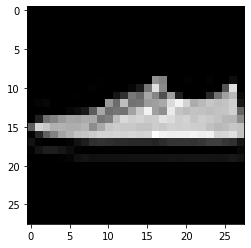

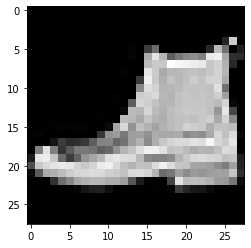

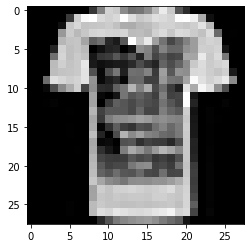

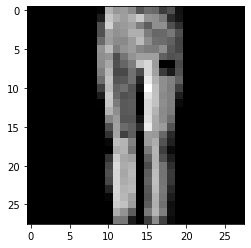

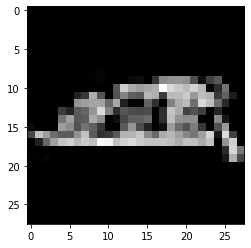

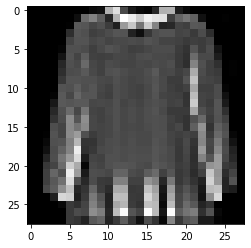

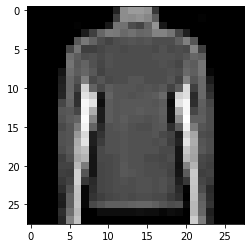

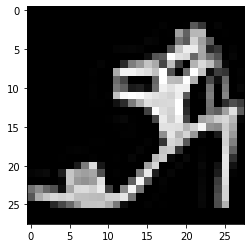

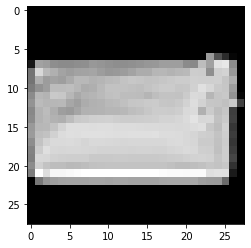

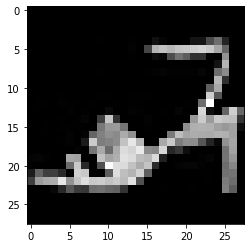

In [33]:
for i in range(10):
    plt.imshow(x_train[i].reshape(28,28),cmap="gray")
    plt.show()

# Building our CNN using keras

In [34]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=[28,28,1]))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.25))


model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

#Compilation of our model
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 128)        

In [38]:
hist = model.fit(x_train,y_train,epochs=10,batch_size=256,verbose=1,validation_data=(x_val,y_val))

Epoch 1/10
188/188 [==============================] - 29s 155ms/step - loss: 0.2960 - accuracy: 0.8903 - val_loss: 0.2680 - val_accuracy: 0.9007
Epoch 2/10
188/188 [==============================] - 31s 163ms/step - loss: 0.2922 - accuracy: 0.8926 - val_loss: 0.2653 - val_accuracy: 0.9015
Epoch 3/10
188/188 [==============================] - 39s 208ms/step - loss: 0.2825 - accuracy: 0.8970 - val_loss: 0.2598 - val_accuracy: 0.9028
Epoch 4/10
188/188 [==============================] - 35s 187ms/step - loss: 0.2751 - accuracy: 0.8991 - val_loss: 0.2549 - val_accuracy: 0.9054
Epoch 5/10
188/188 [==============================] - 31s 163ms/step - loss: 0.2711 - accuracy: 0.8988 - val_loss: 0.2597 - val_accuracy: 0.9045
Epoch 6/10
188/188 [==============================] - 30s 162ms/step - loss: 0.2637 - accuracy: 0.9018 - val_loss: 0.2413 - val_accuracy: 0.9100
Epoch 7/10
188/188 [==============================] - 30s 160ms/step - loss: 0.2591 - accuracy: 0.9048 - val_loss: 0.2454 - val_ac

# Evaluating the model on the test set

In [39]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss: ',score[0])
print('Test accuracy: ',score[1])

Test loss:  0.2187095433473587
Test accuracy:  0.9186999797821045


# Make a single Prediction 

(28, 28, 1)


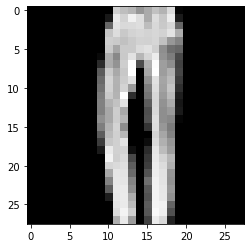

(1, 28, 28, 1)
[[5.9342653e-10 1.0000000e+00 7.4924772e-10 3.2539877e-09 6.7838526e-11
  2.2819347e-15 9.3359237e-11 7.7686580e-17 8.7680089e-12 8.3234726e-15]]


In [46]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Grab an image from the test dataset.
img = x_test[1]
print(img.shape)

plt.imshow(img.reshape(28,28),cmap="gray")
plt.show()

img = (np.expand_dims(img,0))
print(img.shape)

result = model.predict(img)
print(result)

In [44]:
print(class_names[np.argmax(result[0])])

Trouser
